<span style="color:#6116BC">**方法一**</span><br>
1.執行<span style="color:#CE0059">**plt.rcParams['font.sans-serif'] = ['SimHei']**</span><br>
2.將<span style="color:#763CBC">**C:\Windows\Fonts</span>內部的$simhei.ttf$複製到Anaconda3中安裝matplotlib下mpl-data中的fonts**<br>
E.g.<span style="color:#763CBC">**C:\Users\名\Anaconda3\Lib\site-packages\matplotlib\mpl-data\fonts\ttf**</span>

<span style="color:#CE0059">*方法一速度快，缺點為必須每次都多執行一行程式碼*</span>

<span style="color:#16A080">**方法二**</span><br>
**A.**<br>
**1.到Windows系統字體資料夾中，找一個喜歡的中文字體檔案，e.g.simhei.ttf**<br>
**2.將Matplotlib中default的字體檔案Vera.ttf，所選的中文字體重新命名為Vera.ttf**<br>

**B.**<br>
<span style="color:#16A080">**打開mpl-data資料夾中的matplotlibrc檔案，可以用Vim或記事本打開**</span><br>

**1.修改中文字體顯示設定:將font.family的值改為SimHei，並將前面的#去除；將font.serif中的取值新增SimHei**<br>
    >font.family:SimHei
    >中間程式碼省略
    >font.sans-serif:SimHei, Bitstream Vera Sans, Lucida Grande, Verdana...
**2.將axes.unicode_minus True改為False**<br>
    >axes.unicode_minus:False
**C.**<br>
<span style="color:#16A080">**修改rcsetup.py**</span><br>

**1.打開rcsetup.py**<br>
    
    >a map from key -> value, converter<br>>defaultParams = {
    >省略
    >'font.family':[[sans-serif], validate_stringlist]
    >省略
    >'font.sans-serif':[['SimHei','Bitstream Vera Sans', 'DejaVu Sans', 'Lucida Granda, 'Verdana'...]]
    >}

**2.一樣將axes.unicode_minus True改為False**<br>
    ># a map from key -> value, converter
    >defaultParams = {
    >省略
    >'axes.unicode_minus':[False, validate_bool],
    >省略
    >}

<span style="color:#CE0059">*完成**A,B and C**後就可以正常顯示中文了，不必額外執行程式碼*</span>

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
#讀檔
df = pd.read_excel("TEJ_Excel練習_台積電.xlsx")

In [3]:
#看columns
df.columns

Index(['證券代碼', '年月日', '收盤價', '開盤價', '最高價', '最低價', '收盤價(元)', '成交量', '投信買賣超(千股)',
       '自營買賣超(千股)', '外資買賣超(千股)'],
      dtype='object')

In [4]:
#切資料
closing_price = df.iloc[:,2]
opening_price = df.iloc[:,3]

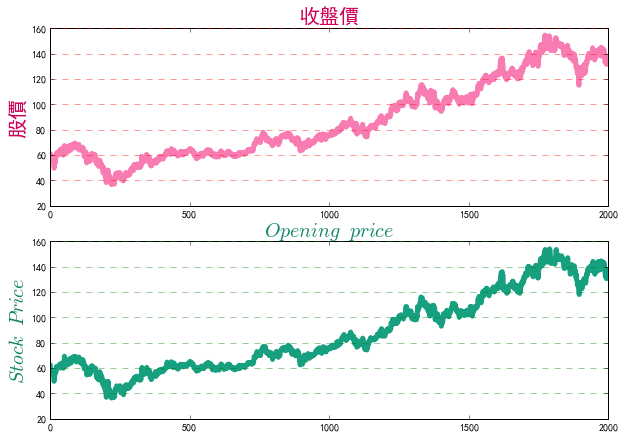

In [12]:
plt.figure(figsize=(10,7),dpi=100)
#分配上下兩圖 subplot(column row index)
p1 = plt.subplot(211)#(2columnwidth 1rowlength index1)
p2 = plt.subplot(212)#(2columnwidth 1rowlength index2)

#圖案主體
p1.plot(closing_price, color = "#F4247E", alpha = 0.6, lw=5)
p2.plot(opening_price, color = "#16A080", lw=5)

#背景格線
p1.grid(True, axis='y', ls='--', color='r', alpha=0.8)
p2.grid(True, axis='y', ls='--', color='g', alpha=0.8)

#正常顯示中、英文
p1.set_title('收盤價', color="#CE0059", fontsize = 20)
p2.set_title('$Opening$ $price$', color="#128469", fontsize = 20)

#y軸標籤
p1.set_ylabel('股價', color="#CE0059", fontsize = 20)
p2.set_ylabel('$Stock$ $Price$', color="#128469", fontsize = 20)
plt.show()